# Smart Lead Scoring Engine

In [1]:
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv("train_wn75k28.csv")
test= pd.read_csv("test_Wf7sxXF.csv")

In [3]:
train.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [4]:
train[train['buy']==1]

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
144,145,2021-01-05,4,5,2.0,2019-02-12,1,0,1,1,1,1,0,0,0,0,0,0,1
159,160,2021-01-05,5,7,3.0,2016-03-11,1,0,0,0,1,1,1,0,0,0,0,0,1
173,174,2021-01-05,6,3,NaN,2020-11-13,0,1,0,0,1,0,0,0,0,0,0,0,1
178,179,2021-01-06,8,9,NaN,2018-07-23,1,0,0,1,1,0,0,0,1,0,0,0,1
274,275,2021-01-08,3,4,2.0,2020-03-01,1,0,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39071,39072,2021-12-31,6,6,NaN,2021-01-01,0,0,1,1,1,1,0,0,0,0,1,0,1
39086,39087,2021-12-31,7,5,1.0,2021-01-17,1,0,0,1,0,0,0,0,0,0,1,0,1
39103,39104,2021-12-31,3,5,2.0,2021-09-30,1,0,0,0,0,1,0,0,0,0,2,0,1
39129,39130,2021-12-31,6,6,NaN,2019-05-19,1,0,0,0,0,1,0,0,0,0,1,0,1


In [51]:
train[train['products_purchased'].isna() + train['buy']==0 ]

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6,2021-01-01,3,4,3.0,2019-07-02,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39154,39155,2021-12-31,7,11,3.0,2020-11-03,0,0,0,0,0,1,0,0,0,0,0,0,0
39156,39157,2021-12-31,11,11,2.0,2017-10-19,1,0,0,0,1,1,1,0,0,0,0,0,0
39157,39158,2021-12-31,3,9,3.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
39158,39159,2021-12-31,8,7,2.0,NaN,1,0,0,0,1,0,1,0,0,0,0,0,0


In [6]:
train[train['products_purchased'].isna() & train['buy']==1]

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
173,174,2021-01-05,6,3,NaN,2020-11-13,0,1,0,0,1,0,0,0,0,0,0,0,1
178,179,2021-01-06,8,9,NaN,2018-07-23,1,0,0,1,1,0,0,0,1,0,0,0,1
305,306,2021-01-09,5,7,NaN,2021-05-27,1,0,0,0,0,0,0,0,0,0,0,0,1
326,327,2021-01-10,3,6,NaN,2017-01-10,0,0,0,1,0,1,0,0,0,0,0,0,1
345,346,2021-01-10,5,8,NaN,2020-06-05,1,0,0,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38871,38872,2021-12-30,3,6,NaN,2020-11-17,0,0,0,0,1,0,0,0,0,0,1,0,1
38964,38965,2021-12-30,5,6,NaN,2020-03-01,1,0,0,0,1,1,1,1,1,0,0,0,1
39071,39072,2021-12-31,6,6,NaN,2021-01-01,0,0,1,1,1,1,0,0,0,0,1,0,1
39129,39130,2021-12-31,6,6,NaN,2019-05-19,1,0,0,0,0,1,0,0,0,0,1,0,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [8]:
print("signup_date :",train.signup_date.nunique())
print("created_at :",train.created_at.nunique())
print("campaign_var_1 :",train.campaign_var_1.nunique())
print("campaign_var_2 :",train.campaign_var_2.nunique())
print("products_purchased :",train.products_purchased.nunique())

signup_date : 1800
created_at : 365
campaign_var_1 : 16
campaign_var_2 : 15
products_purchased : 4


In [57]:
train['signup_date'].value_counts()

2021-07-18    45
2021-08-03    38
2021-09-10    38
2021-01-28    38
2021-09-20    38
              ..
2018-10-18     1
2017-10-07     1
2018-04-20     1
2016-09-11     1
2016-02-02     1
Name: signup_date, Length: 1800, dtype: int64

In [59]:
df3['day_of_week'].value_counts()

Monday       5672
Sunday       5630
Thursday     5596
Wednesday    5580
Friday       5572
Saturday     5570
Tuesday      5541
Name: day_of_week, dtype: int64

In [58]:
train['created_at'].value_counts()

2021-12-26    181
2021-12-09    180
2021-12-21    179
2021-12-07    179
2021-12-04    178
             ... 
2021-01-07     34
2021-01-14     33
2021-01-06     29
2021-01-22     26
2021-01-01     21
Name: created_at, Length: 365, dtype: int64

In [54]:
# Check the value counts for the column 

train['products_purchased'].value_counts()

2.0    8867
3.0    5024
1.0    3643
4.0     716
Name: products_purchased, dtype: int64

In [55]:
# Check the value counts for the column 

train['campaign_var_1'].value_counts()

6     4061
5     4060
4     4018
3     3784
7     3756
2     3486
8     3407
9     2866
10    2392
11    1873
1     1593
12    1455
13    1059
14     714
15     456
16     181
Name: campaign_var_1, dtype: int64

In [56]:
# Check the value counts for the column 

train['campaign_var_2'].value_counts()

6     5744
7     5472
5     5250
8     4690
4     4213
9     3537
3     2883
10    2298
2     1788
11    1410
12     761
1      589
13     351
14     151
15      24
Name: campaign_var_2, dtype: int64

In [9]:
train['buy'].value_counts()

0    37163
1     1998
Name: buy, dtype: int64

In [47]:
train[train.duplicated(keep=False)]

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy


In [52]:
# Checking outliers at 25%,50%,75%,90%,95% and above
train.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,35245.000000,11.000000,10.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
95%,37203.000000,13.000000,11.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
99%,38769.400000,15.000000,13.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000


In [48]:
# check for percentage of null values in each column

percent_missing = round(100*(train.isnull().sum()/len(train.index)), 2)
print(percent_missing)

id                       0.00
created_at               0.00
campaign_var_1           0.00
campaign_var_2           0.00
products_purchased      53.40
signup_date             38.59
user_activity_var_1      0.00
user_activity_var_2      0.00
user_activity_var_3      0.00
user_activity_var_4      0.00
user_activity_var_5      0.00
user_activity_var_6      0.00
user_activity_var_7      0.00
user_activity_var_8      0.00
user_activity_var_9      0.00
user_activity_var_10     0.00
user_activity_var_11     0.00
user_activity_var_12     0.00
buy                      0.00
dtype: float64


In [10]:
df=pd.DataFrame(train, columns=['signup_date', 'created_at'])
df.head(6)

,signup_date,created_at
0,2020-09-24,2021-01-01
1,2020-09-19,2021-01-01
2,2021-08-11,2021-01-01
3,2017-10-04,2021-01-01
4,2020-06-08,2021-01-01
5,2019-07-02,2021-01-01


In [11]:
df.isnull().sum()

signup_date    15113
created_at         0
dtype: int64

In [12]:
df[df['signup_date'].isna()]


,signup_date,created_at
11,NaN,2021-01-01
21,NaN,2021-01-02
22,NaN,2021-01-02
29,NaN,2021-01-02
35,NaN,2021-01-02
...,...,...
39153,NaN,2021-12-31
39155,NaN,2021-12-31
39157,NaN,2021-12-31
39158,NaN,2021-12-31


In [13]:
df1=pd.DataFrame(train, columns=['signup_date', 'created_at','products_purchased'])
df1.head(6)

,signup_date,created_at,products_purchased
0,2020-09-24,2021-01-01,2.0
1,2020-09-19,2021-01-01,2.0
2,2021-08-11,2021-01-01,3.0
3,2017-10-04,2021-01-01,2.0
4,2020-06-08,2021-01-01,NaN
5,2019-07-02,2021-01-01,3.0


In [14]:
df1.isnull().sum()

signup_date           15113
created_at                0
products_purchased    20911
dtype: int64

In [15]:
df1[df1['products_purchased'].isna()]

,signup_date,created_at,products_purchased
4,2020-06-08,2021-01-01,NaN
7,2020-12-12,2021-01-01,NaN
11,NaN,2021-01-01,NaN
14,2019-05-03,2021-01-01,NaN
15,2021-03-09,2021-01-01,NaN
...,...,...,...
39150,NaN,2021-12-31,NaN
39152,NaN,2021-12-31,NaN
39153,NaN,2021-12-31,NaN
39155,NaN,2021-12-31,NaN


In [16]:
df1[df1['signup_date'].isna()]

,signup_date,created_at,products_purchased
11,NaN,2021-01-01,NaN
21,NaN,2021-01-02,NaN
22,NaN,2021-01-02,NaN
29,NaN,2021-01-02,NaN
35,NaN,2021-01-02,NaN
...,...,...,...
39153,NaN,2021-12-31,NaN
39155,NaN,2021-12-31,NaN
39157,NaN,2021-12-31,3.0
39158,NaN,2021-12-31,2.0


In [17]:
df1[df1['signup_date'].isna() & df1['products_purchased'].isna()]

,signup_date,created_at,products_purchased
11,NaN,2021-01-01,NaN
21,NaN,2021-01-02,NaN
22,NaN,2021-01-02,NaN
29,NaN,2021-01-02,NaN
35,NaN,2021-01-02,NaN
...,...,...,...
39147,NaN,2021-12-31,NaN
39150,NaN,2021-12-31,NaN
39152,NaN,2021-12-31,NaN
39153,NaN,2021-12-31,NaN


In [18]:
df1[df1['signup_date'].isna() & df1['products_purchased'].isna()]


,signup_date,created_at,products_purchased
11,NaN,2021-01-01,NaN
21,NaN,2021-01-02,NaN
22,NaN,2021-01-02,NaN
29,NaN,2021-01-02,NaN
35,NaN,2021-01-02,NaN
...,...,...,...
39147,NaN,2021-12-31,NaN
39150,NaN,2021-12-31,NaN
39152,NaN,2021-12-31,NaN
39153,NaN,2021-12-31,NaN


In [19]:
df.groupby(df.created_at).groups

{'2021-01-01': Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
             19, 20],
            dtype='int64'),
 '2021-01-02': Int64Index([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
             38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
             55, 56, 57, 58, 59, 60, 61, 62, 63],
            dtype='int64'),
 '2021-01-03': Int64Index([ 64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
              77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
              90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101],
            dtype='int64'),
 '2021-01-04': Int64Index([102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
             115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
             128, 129, 130, 131, 132, 133, 134, 135, 136, 137],
            dtype='int64'),
 '2021-01-05': Int64Index([138, 139, 140, 141, 142, 143, 144, 145, 14

In [20]:
df.groupby(['signup_date','created_at']).groups

{('2020-09-24', '2021-01-01'): Int64Index([0], dtype='int64'),
 ('2020-09-19', '2021-01-01'): Int64Index([1], dtype='int64'),
 ('2021-08-11', '2021-01-01'): Int64Index([2], dtype='int64'),
 ('2017-10-04', '2021-01-01'): Int64Index([3], dtype='int64'),
 ('2020-06-08', '2021-01-01'): Int64Index([4], dtype='int64'),
 ('2019-07-02', '2021-01-01'): Int64Index([5], dtype='int64'),
 ('2019-07-24', '2021-01-01'): Int64Index([6], dtype='int64'),
 ('2020-12-12', '2021-01-01'): Int64Index([7], dtype='int64'),
 ('2018-06-21', '2021-01-01'): Int64Index([8], dtype='int64'),
 ('2021-10-20', '2021-01-01'): Int64Index([9, 17], dtype='int64'),
 ('2019-01-07', '2021-01-01'): Int64Index([10], dtype='int64'),
 (nan, '2021-01-01'): Int64Index([11], dtype='int64'),
 ('2019-12-09', '2021-01-01'): Int64Index([12], dtype='int64'),
 ('2017-01-28', '2021-01-01'): Int64Index([13], dtype='int64'),
 ('2019-05-03', '2021-01-01'): Int64Index([14], dtype='int64'),
 ('2021-03-09', '2021-01-01'): Int64Index([15], dtype='

In [21]:
grouped=df.groupby('created_at')

In [22]:
print(grouped.get_group('2021-01-01')) ,print(grouped.get_group('2021-01-02'))

   signup_date  created_at
0   2020-09-24  2021-01-01
1   2020-09-19  2021-01-01
2   2021-08-11  2021-01-01
3   2017-10-04  2021-01-01
4   2020-06-08  2021-01-01
5   2019-07-02  2021-01-01
6   2019-07-24  2021-01-01
7   2020-12-12  2021-01-01
8   2018-06-21  2021-01-01
9   2021-10-20  2021-01-01
10  2019-01-07  2021-01-01
11         NaN  2021-01-01
12  2019-12-09  2021-01-01
13  2017-01-28  2021-01-01
14  2019-05-03  2021-01-01
15  2021-03-09  2021-01-01
16  2020-10-31  2021-01-01
17  2021-10-20  2021-01-01
18  2017-10-12  2021-01-01
19  2020-10-22  2021-01-01
20  2021-07-22  2021-01-01
   signup_date  created_at
21         NaN  2021-01-02
22         NaN  2021-01-02
23  2021-02-06  2021-01-02
24  2021-05-09  2021-01-02
25  2020-01-14  2021-01-02
26  2021-04-07  2021-01-02
27  2019-09-18  2021-01-02
28  2020-08-04  2021-01-02
29         NaN  2021-01-02
30  2020-11-16  2021-01-02
31  2021-02-16  2021-01-02
32  2020-08-06  2021-01-02
33  2020-07-09  2021-01-02
34  2019-07-10  2021-01-02
3

(None, None)

In [23]:
df_sort=df.sort_values('signup_date')

In [24]:
df_sort.head(10)

,signup_date,created_at
10325,2015-02-07,2021-06-05
30492,2015-06-01,2021-11-06
30972,2015-06-20,2021-11-09
7047,2015-08-20,2021-04-30
11609,2015-09-26,2021-06-17
483,2015-11-04,2021-01-13
8158,2015-11-06,2021-05-13
3857,2015-11-19,2021-03-19
1486,2015-12-07,2021-02-05
29053,2015-12-08,2021-10-28


In [25]:
df_sort

,signup_date,created_at
10325,2015-02-07,2021-06-05
30492,2015-06-01,2021-11-06
30972,2015-06-20,2021-11-09
7047,2015-08-20,2021-04-30
11609,2015-09-26,2021-06-17
...,...,...
39153,NaN,2021-12-31
39155,NaN,2021-12-31
39157,NaN,2021-12-31
39158,NaN,2021-12-31


In [26]:
df4=pd.DataFrame(train, columns=['created_at','products_purchased'])
df4.head(6)

,created_at,products_purchased
0,2021-01-01,2.0
1,2021-01-01,2.0
2,2021-01-01,3.0
3,2021-01-01,2.0
4,2021-01-01,NaN
5,2021-01-01,3.0


In [27]:
df4[df4['products_purchased'].isna()]

,created_at,products_purchased
4,2021-01-01,NaN
7,2021-01-01,NaN
11,2021-01-01,NaN
14,2021-01-01,NaN
15,2021-01-01,NaN
...,...,...
39150,2021-12-31,NaN
39152,2021-12-31,NaN
39153,2021-12-31,NaN
39155,2021-12-31,NaN


In [28]:
df3=pd.DataFrame(train, columns=['signup_date', 'created_at','products_purchased'])
df3.head(6)

,signup_date,created_at,products_purchased
0,2020-09-24,2021-01-01,2.0
1,2020-09-19,2021-01-01,2.0
2,2021-08-11,2021-01-01,3.0
3,2017-10-04,2021-01-01,2.0
4,2020-06-08,2021-01-01,NaN
5,2019-07-02,2021-01-01,3.0


In [29]:
#df3['Number_of_days'] = ((df3.signup_date - df3.created_at)/np.timedelta64(1, 'D'))
df3.signup_date = pd.to_datetime(df3.signup_date)
df3.created_at = pd.to_datetime(df3.created_at)
difference = (df3.created_at-df3.signup_date )
df3['day_of_week'] = df3['created_at'].dt.day_name()
#df3['d']=df3['day_of_week'].dt.day_of_week
df3['d'] = df3['created_at'].dt.strftime("%w")

In [30]:
df3['ddiff']=difference

In [31]:
df3

,signup_date,created_at,products_purchased,day_of_week,d,ddiff
0,2020-09-24,2021-01-01,2.0,Friday,5,99 days
1,2020-09-19,2021-01-01,2.0,Friday,5,104 days
2,2021-08-11,2021-01-01,3.0,Friday,5,-222 days
3,2017-10-04,2021-01-01,2.0,Friday,5,1185 days
4,2020-06-08,2021-01-01,NaN,Friday,5,207 days
...,...,...,...,...,...,...
39156,2017-10-19,2021-12-31,2.0,Friday,5,1534 days
39157,NaT,2021-12-31,3.0,Friday,5,NaT
39158,NaT,2021-12-31,2.0,Friday,5,NaT
39159,NaT,2021-12-31,2.0,Friday,5,NaT


In [32]:
df3['day_of_week'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [33]:
df3['d'].value_counts()

1    5672
0    5630
4    5596
3    5580
5    5572
6    5570
2    5541
Name: d, dtype: int64

In [34]:
df3[df3['day_of_week']=='Monday']

,signup_date,created_at,products_purchased,day_of_week,d,ddiff
102,2019-03-10,2021-01-04,3.0,Monday,1,666 days
103,NaT,2021-01-04,NaN,Monday,1,NaT
104,2021-01-28,2021-01-04,NaN,Monday,1,-24 days
105,2020-08-10,2021-01-04,NaN,Monday,1,147 days
106,2020-06-01,2021-01-04,2.0,Monday,1,217 days
...,...,...,...,...,...,...
38557,NaT,2021-12-27,1.0,Monday,1,NaT
38558,2021-10-09,2021-12-27,NaN,Monday,1,79 days
38559,NaT,2021-12-27,1.0,Monday,1,NaT
38560,2021-11-26,2021-12-27,2.0,Monday,1,31 days


In [35]:
df3[df3['day_of_week']=='Tuesday']

,signup_date,created_at,products_purchased,day_of_week,d,ddiff
138,2019-08-10,2021-01-05,2.0,Tuesday,2,514 days
139,2020-02-19,2021-01-05,NaN,Tuesday,2,321 days
140,2018-07-29,2021-01-05,4.0,Tuesday,2,891 days
141,NaT,2021-01-05,NaN,Tuesday,2,NaT
142,2021-05-30,2021-01-05,NaN,Tuesday,2,-145 days
...,...,...,...,...,...,...
38709,NaT,2021-12-28,NaN,Tuesday,2,NaT
38710,2022-01-01,2021-12-28,1.0,Tuesday,2,-4 days
38711,NaT,2021-12-28,2.0,Tuesday,2,NaT
38712,NaT,2021-12-28,3.0,Tuesday,2,NaT


In [36]:
df3[df3['ddiff'].isna() & df3['products_purchased'].isna()]

,signup_date,created_at,products_purchased,day_of_week,d,ddiff
11,NaT,2021-01-01,NaN,Friday,5,NaT
21,NaT,2021-01-02,NaN,Saturday,6,NaT
22,NaT,2021-01-02,NaN,Saturday,6,NaT
29,NaT,2021-01-02,NaN,Saturday,6,NaT
35,NaT,2021-01-02,NaN,Saturday,6,NaT
...,...,...,...,...,...,...
39147,NaT,2021-12-31,NaN,Friday,5,NaT
39150,NaT,2021-12-31,NaN,Friday,5,NaT
39152,NaT,2021-12-31,NaN,Friday,5,NaT
39153,NaT,2021-12-31,NaN,Friday,5,NaT


In [37]:
df3[df3['day_of_week'].isna() | df3['products_purchased'].isna()]

,signup_date,created_at,products_purchased,day_of_week,d,ddiff
4,2020-06-08,2021-01-01,NaN,Friday,5,207 days
7,2020-12-12,2021-01-01,NaN,Friday,5,20 days
11,NaT,2021-01-01,NaN,Friday,5,NaT
14,2019-05-03,2021-01-01,NaN,Friday,5,609 days
15,2021-03-09,2021-01-01,NaN,Friday,5,-67 days
...,...,...,...,...,...,...
39150,NaT,2021-12-31,NaN,Friday,5,NaT
39152,NaT,2021-12-31,NaN,Friday,5,NaT
39153,NaT,2021-12-31,NaN,Friday,5,NaT
39155,NaT,2021-12-31,NaN,Friday,5,NaT


In [38]:
df3[df3['products_purchased'].isna()]

,signup_date,created_at,products_purchased,day_of_week,d,ddiff
4,2020-06-08,2021-01-01,NaN,Friday,5,207 days
7,2020-12-12,2021-01-01,NaN,Friday,5,20 days
11,NaT,2021-01-01,NaN,Friday,5,NaT
14,2019-05-03,2021-01-01,NaN,Friday,5,609 days
15,2021-03-09,2021-01-01,NaN,Friday,5,-67 days
...,...,...,...,...,...,...
39150,NaT,2021-12-31,NaN,Friday,5,NaT
39152,NaT,2021-12-31,NaN,Friday,5,NaT
39153,NaT,2021-12-31,NaN,Friday,5,NaT
39155,NaT,2021-12-31,NaN,Friday,5,NaT


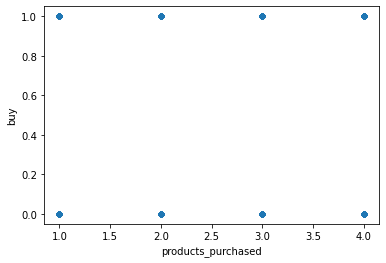

In [39]:
train.plot.scatter(x='products_purchased', y='buy', style='-')


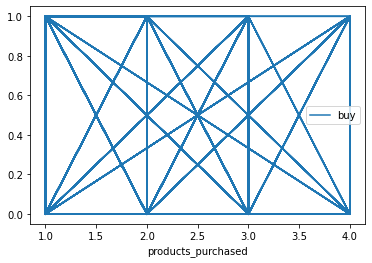

In [40]:
train.plot(x="products_purchased", y=["buy"])


In [42]:
df3.isna().sum().sort_values()


created_at                0
day_of_week               0
d                         0
signup_date           15113
ddiff                 15113
products_purchased    20911
dtype: int64

In [43]:
df3.loc[39157]

signup_date                           NaT
created_at            2021-12-31 00:00:00
products_purchased                      3
day_of_week                        Friday
d                                       5
ddiff                                 NaT
Name: 39157, dtype: object

In [44]:
df3.loc[39158]

signup_date                           NaT
created_at            2021-12-31 00:00:00
products_purchased                      2
day_of_week                        Friday
d                                       5
ddiff                                 NaT
Name: 39158, dtype: object

In [45]:
train.head(6)

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0
5,6,2021-01-01,3,4,3.0,2019-07-02,0,0,0,0,0,1,0,0,0,0,0,0,0


In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    13184 non-null  int64  
 1   created_at            13184 non-null  object 
 2   campaign_var_1        13184 non-null  int64  
 3   campaign_var_2        13184 non-null  int64  
 4   products_purchased    5048 non-null   float64
 5   signup_date           6535 non-null   object 
 6   user_activity_var_1   13184 non-null  int64  
 7   user_activity_var_2   13184 non-null  int64  
 8   user_activity_var_3   13184 non-null  int64  
 9   user_activity_var_4   13184 non-null  int64  
 10  user_activity_var_5   13184 non-null  int64  
 11  user_activity_var_6   13184 non-null  int64  
 12  user_activity_var_7   13184 non-null  int64  
 13  user_activity_var_8   13184 non-null  int64  
 14  user_activity_var_9   13184 non-null  int64  
 15  user_activity_var_1